# step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# step 2: load the data

In [2]:
data = pd.read_csv(r"C:\Users\athir\data_sets\ML\Assg\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [3]:
data.shape

(53392, 33)

In [4]:
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

# step 3: data cleaning, data wrangling, data preprocessing

In [6]:
data.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [7]:
data.isnull().sum()/len(data)*100

YearStart                       0.000000
YearEnd                         0.000000
LocationAbbr                    0.000000
LocationDesc                    0.000000
Datasource                      0.000000
Class                           0.000000
Topic                           0.000000
Question                        0.000000
Data_Value_Unit               100.000000
Data_Value_Type                 0.000000
Data_Value                      9.450854
Data_Value_Alt                  9.450854
Data_Value_Footnote_Symbol     90.549146
Data_Value_Footnote            90.549146
Low_Confidence_Limit            9.450854
High_Confidence_Limit           9.450854
Sample_Size                     9.450854
Total                          96.428304
Age(years)                     78.577315
Education                      85.713215
Gender                         92.856608
Income                         74.998127
Race/Ethnicity                 71.426431
GeoLocation                     1.887923
ClassID         

In [8]:
# dropping the columns with missing values greater than 30%.

data = data.drop(['Data_Value_Unit','Data_Value_Footnote_Symbol','Data_Value_Footnote','Total','Age(years)','Education',
                 'Gender','Income','Race/Ethnicity'],axis=1)

In [9]:
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.3,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.8,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.6,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.8,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  53392 non-null  int64  
 1   YearEnd                    53392 non-null  int64  
 2   LocationAbbr               53392 non-null  object 
 3   LocationDesc               53392 non-null  object 
 4   Datasource                 53392 non-null  object 
 5   Class                      53392 non-null  object 
 6   Topic                      53392 non-null  object 
 7   Question                   53392 non-null  object 
 8   Data_Value_Type            53392 non-null  object 
 9   Data_Value                 48346 non-null  float64
 10  Data_Value_Alt             48346 non-null  float64
 11  Low_Confidence_Limit       48346 non-null  float64
 12  High_Confidence_Limit      48346 non-null  float64
 13  Sample_Size                48346 non-null  flo

In [11]:
# dropping unnecessary columns in the data.

data = data.drop(['YearStart','YearEnd','Datasource','Class','Topic','Data_Value_Alt','Low_Confidence_Limit',
                  'High_Confidence_Limit ','Data_Value_Type', 'GeoLocation','ClassID','TopicID','QuestionID',
                 'DataValueTypeID','StratificationCategory1','Stratification1','StratificationCategoryId1','StratificationID1','LocationDesc','LocationID'],axis =1)
data.head()

,LocationAbbr,Question,Data_Value,Sample_Size
0,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0
1,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0
2,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0
3,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0
4,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0


In [12]:
data.shape

(53392, 4)

In [13]:
data.isnull().sum()

LocationAbbr       0
Question           0
Data_Value      5046
Sample_Size     5046
dtype: int64

In [14]:
data[['Data_Value','Sample_Size']] = data[['Data_Value','Sample_Size']].fillna(data[['Data_Value','Sample_Size']].mean())

In [15]:
data.isnull().sum()

LocationAbbr    0
Question        0
Data_Value      0
Sample_Size     0
dtype: int64

## Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [17]:
data[['Sample_Size']] = ss.fit_transform(data[['Sample_Size']])
data.head()

,LocationAbbr,Question,Data_Value,Sample_Size
0,AL,Percent of adults aged 18 years and older who ...,32.0,0.180975
1,AL,Percent of adults aged 18 years and older who ...,32.3,-0.069330
2,AL,Percent of adults aged 18 years and older who ...,31.8,0.044189
3,AL,Percent of adults aged 18 years and older who ...,33.6,-0.145010
4,AL,Percent of adults aged 18 years and older who ...,32.8,-0.078817


<Axes: >

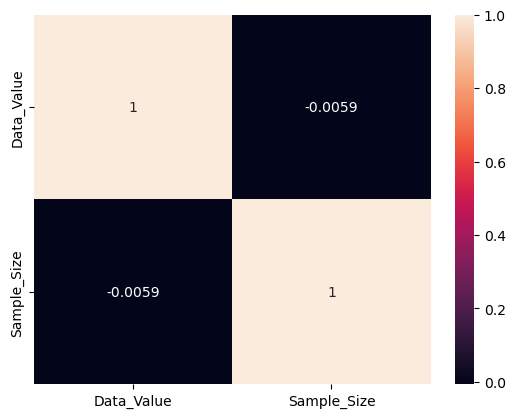

In [18]:
sns.heatmap(data.corr(),annot = True)

In [19]:
# Feature Encoding

In [20]:
data_ohe = pd.get_dummies(data[['LocationAbbr']])
data_ohe

,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,LocationAbbr_DC,LocationAbbr_DE,LocationAbbr_FL,...,LocationAbbr_TX,LocationAbbr_US,LocationAbbr_UT,LocationAbbr_VA,LocationAbbr_VI,LocationAbbr_VT,LocationAbbr_WA,LocationAbbr_WI,LocationAbbr_WV,LocationAbbr_WY
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
data = pd.concat([data,data_ohe],axis=1)

In [22]:
data.head()

,LocationAbbr,Question,Data_Value,Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,...,LocationAbbr_TX,LocationAbbr_US,LocationAbbr_UT,LocationAbbr_VA,LocationAbbr_VI,LocationAbbr_VT,LocationAbbr_WA,LocationAbbr_WI,LocationAbbr_WV,LocationAbbr_WY
0,AL,Percent of adults aged 18 years and older who ...,32.0,0.180975,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AL,Percent of adults aged 18 years and older who ...,32.3,-0.069330,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AL,Percent of adults aged 18 years and older who ...,31.8,0.044189,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AL,Percent of adults aged 18 years and older who ...,33.6,-0.145010,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AL,Percent of adults aged 18 years and older who ...,32.8,-0.078817,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data = data.drop(['LocationAbbr'],axis =1)
data.head()

,Question,Data_Value,Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,LocationAbbr_TX,LocationAbbr_US,LocationAbbr_UT,LocationAbbr_VA,LocationAbbr_VI,LocationAbbr_VT,LocationAbbr_WA,LocationAbbr_WI,LocationAbbr_WV,LocationAbbr_WY
0,Percent of adults aged 18 years and older who ...,32.0,0.180975,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Percent of adults aged 18 years and older who ...,32.3,-0.069330,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Percent of adults aged 18 years and older who ...,31.8,0.044189,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Percent of adults aged 18 years and older who ...,33.6,-0.145010,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Percent of adults aged 18 years and older who ...,32.8,-0.078817,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

In [25]:
data2_ohe = pd.get_dummies(data[['Question']])
data2_ohe.head()

,Question_Percent of adults aged 18 years and older who have an overweight classification,Question_Percent of adults aged 18 years and older who have obesity,Question_Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Question_Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Question_Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Question_Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Question_Percent of adults who engage in no leisure-time physical activity,Question_Percent of adults who report consuming fruit less than one time daily,Question_Percent of adults who report consuming vegetables less than one time daily
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [26]:
data = pd.concat([data,data2_ohe],axis=1)
data.head()

,Question,Data_Value,Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,LocationAbbr_WY,Question_Percent of adults aged 18 years and older who have an overweight classification,Question_Percent of adults aged 18 years and older who have obesity,Question_Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Question_Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Question_Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Question_Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Question_Percent of adults who engage in no leisure-time physical activity,Question_Percent of adults who report consuming fruit less than one time daily,Question_Percent of adults who report consuming vegetables less than one time daily
0,Percent of adults aged 18 years and older who ...,32.0,0.180975,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Percent of adults aged 18 years and older who ...,32.3,-0.069330,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Percent of adults aged 18 years and older who ...,31.8,0.044189,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Percent of adults aged 18 years and older who ...,33.6,-0.145010,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Percent of adults aged 18 years and older who ...,32.8,-0.078817,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
data = data.drop('Question',axis=1)
data.head()

,Data_Value,Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,LocationAbbr_DC,...,LocationAbbr_WY,Question_Percent of adults aged 18 years and older who have an overweight classification,Question_Percent of adults aged 18 years and older who have obesity,Question_Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Question_Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Question_Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Question_Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Question_Percent of adults who engage in no leisure-time physical activity,Question_Percent of adults who report consuming fruit less than one time daily,Question_Percent of adults who report consuming vegetables less than one time daily
0,32.0,0.180975,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32.3,-0.069330,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,31.8,0.044189,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,33.6,-0.145010,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,32.8,-0.078817,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# step 4: separate  x and y

In [28]:
x = data.drop('Data_Value',axis=1)
y = data['Data_Value']

# step 5: split the data

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

# apply linear regression on the train data

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

# Perform predictions on test set

In [32]:
y_pred = lr.predict(x_test)
y_pred

array([20.90625   , 35.18554688, 24.30957031, ..., 26.74707031,
       26.328125  , 25.85839844])

# Evaluations

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5153103315413108